# phs000424-GRU


> See the setup notebook if this is a new workspace

> Load example data from AnVIL

In [1]:
import sys
# add git repo to our path (TODO - eliminate this step if we create a fhir-workshop package)
sys.path.append('./fhir-workshop')


In [2]:
from fhir_workshop.graph import load_graph, draw_graph, summarize_graph, find_by_resource_type, find_nearest
import fhir_workshop.manifests as manifests
import os
import pandas as pd 
from flatten_json import flatten



## Load the data


> In lieu of accessing a 'live' fhir service, we've pre-fetched some data


> The `load_graph` function loads the file paths into fhir resources and creates linkages between them, effectively simulating links the fhir server would normally provide


In [3]:
graph = load_graph('phs000424', manifests.phs000424_file_paths(), expected_resource_count=71494)

### Draw a summary graph

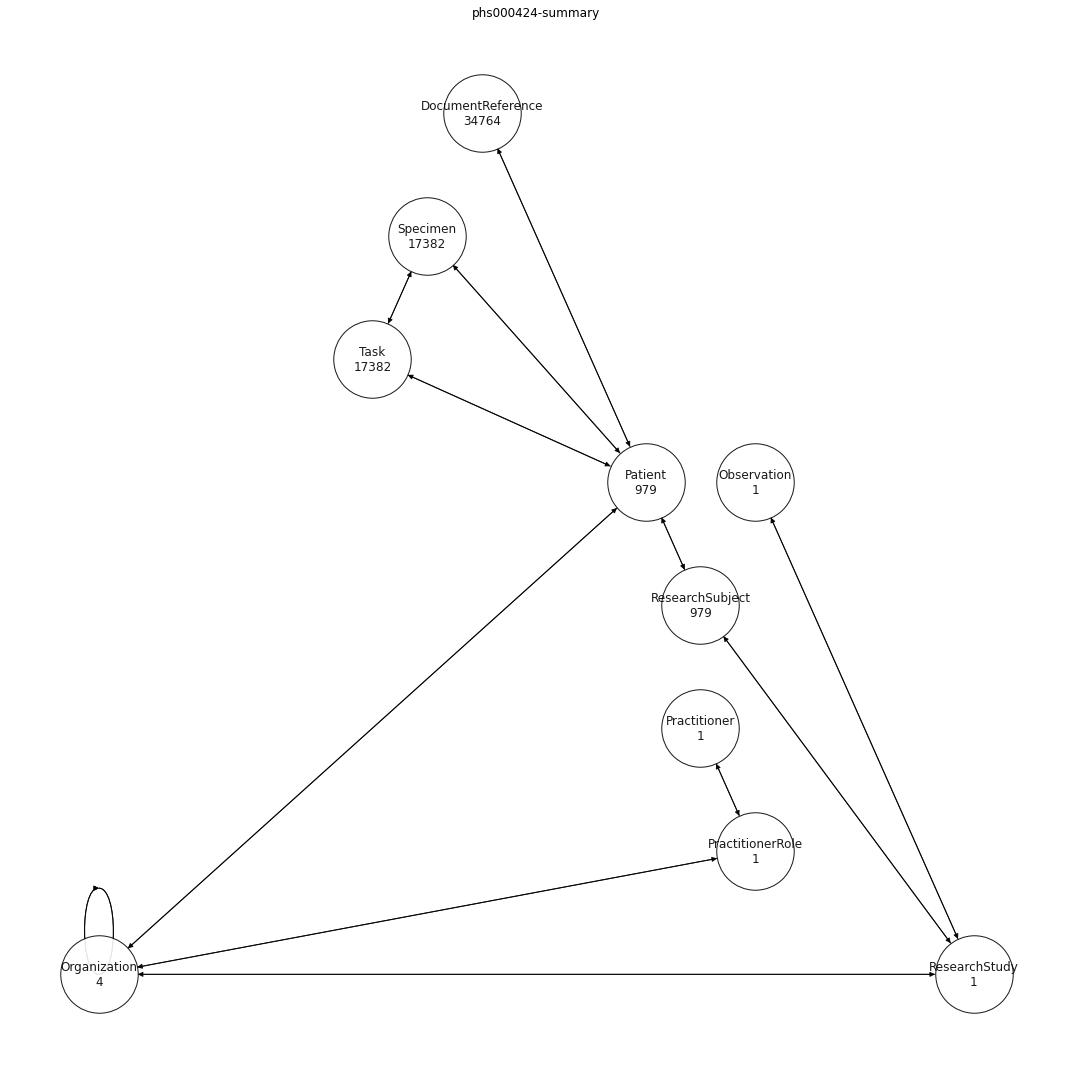

In [4]:
summary_graph = summarize_graph(graph)
path = os.path.join('/tmp/', 'phs000424-summary.png')
draw_graph(summary_graph, path=path)

### Retrieve all Patients

In [5]:
# "retrieve" the patients
patients = find_by_resource_type(graph, 'Patient')
# count the tuples that returned
assert len(patients) == 979, "should have 979 patients"
# get the FHIR resource
patients = [dict_['resource'] for id_, dict_ in patients]


### Show details

In [6]:
pd.DataFrame([flatten(patient.as_json()) for patient in patients] )

,id,extension_0_url,extension_0_valueInteger,identifier_0_system,identifier_0_value,gender,managingOrganization_reference,resourceType
0,04ae3b9b-22c7-5841-b0bb-276d208a59f6,https://emerge.hgsc.bcm.edu/fhir/StructureDefi...,66,https://anvil.terra.bio/#workspaces/anvil-data...,participant/GTEX-1117F,female,Organization/e3844104-71ff-507c-91cc-81c998a34bdd,Patient
1,2ebad4e9-3fb1-5421-9590-2d3d227c7c7f,https://emerge.hgsc.bcm.edu/fhir/StructureDefi...,57,https://anvil.terra.bio/#workspaces/anvil-data...,participant/GTEX-111CU,male,Organization/e3844104-71ff-507c-91cc-81c998a34bdd,Patient
2,921c2718-9f26-501b-9a74-b6116f294e31,https://emerge.hgsc.bcm.edu/fhir/StructureDefi...,61,https://anvil.terra.bio/#workspaces/anvil-data...,participant/GTEX-111FC,male,Organization/e3844104-71ff-507c-91cc-81c998a34bdd,Patient
3,5b2e6a0c-d8ae-5ad8-96df-1e494824f0a4,https://emerge.hgsc.bcm.edu/fhir/StructureDefi...,63,https://anvil.terra.bio/#workspaces/anvil-data...,participant/GTEX-111VG,male,Organization/e3844104-71ff-507c-91cc-81c998a34bdd,Patient
4,adb804f7-eb6d-58cb-a651-cc574e139752,https://emerge.hgsc.bcm.edu/fhir/StructureDefi...,62,https://anvil.terra.bio/#workspaces/anvil-data...,participant/GTEX-111YS,male,Organization/e3844104-71ff-507c-91cc-81c998a34bdd,Patient
...,...,...,...,...,...,...,...,...
974,d7f93ae8-4d49-5c17-8766-219016df764b,https://emerge.hgsc.bcm.edu/fhir/StructureDefi...,45,https://anvil.terra.bio/#workspaces/anvil-data...,participant/GTEX-ZYWO,female,Organization/e3844104-71ff-507c-91cc-81c998a34bdd,Patient
975,13ac6554-f53d-52c2-a9d8-8dab38c0d0bd,https://emerge.hgsc.bcm.edu/fhir/StructureDefi...,67,https://anvil.terra.bio/#workspaces/anvil-data...,participant/GTEX-ZYY3,female,Organization/e3844104-71ff-507c-91cc-81c998a34bdd,Patient
976,7101ff7d-5acf-5df2-8c8e-b50eb87da5fb,https://emerge.hgsc.bcm.edu/fhir/StructureDefi...,24,https://anvil.terra.bio/#workspaces/anvil-data...,participant/GTEX-ZZ64,male,Organization/e3844104-71ff-507c-91cc-81c998a34bdd,Patient
977,2a4a5bee-354c-5bb1-bff5-0dc9f639268b,https://emerge.hgsc.bcm.edu/fhir/StructureDefi...,53,https://anvil.terra.bio/#workspaces/anvil-data...,participant/GTEX-ZZPT,male,Organization/e3844104-71ff-507c-91cc-81c998a34bdd,Patient


### Show simplified details

> 1/3 the number of columns

In [7]:
pd.DataFrame([flatten(patient.as_simplified_json()[0]) for patient in patients] )

,id,extension_patient-age,identifier_https://anvil.terra.bio/#workspaces/anvil-datastorage/AnVIL_GTEx_V8_hg38,gender,managingOrganization_reference
0,04ae3b9b-22c7-5841-b0bb-276d208a59f6,66,participant/GTEX-1117F,female,Organization/e3844104-71ff-507c-91cc-81c998a34bdd
1,2ebad4e9-3fb1-5421-9590-2d3d227c7c7f,57,participant/GTEX-111CU,male,Organization/e3844104-71ff-507c-91cc-81c998a34bdd
2,921c2718-9f26-501b-9a74-b6116f294e31,61,participant/GTEX-111FC,male,Organization/e3844104-71ff-507c-91cc-81c998a34bdd
3,5b2e6a0c-d8ae-5ad8-96df-1e494824f0a4,63,participant/GTEX-111VG,male,Organization/e3844104-71ff-507c-91cc-81c998a34bdd
4,adb804f7-eb6d-58cb-a651-cc574e139752,62,participant/GTEX-111YS,male,Organization/e3844104-71ff-507c-91cc-81c998a34bdd
...,...,...,...,...,...
974,d7f93ae8-4d49-5c17-8766-219016df764b,45,participant/GTEX-ZYWO,female,Organization/e3844104-71ff-507c-91cc-81c998a34bdd
975,13ac6554-f53d-52c2-a9d8-8dab38c0d0bd,67,participant/GTEX-ZYY3,female,Organization/e3844104-71ff-507c-91cc-81c998a34bdd
976,7101ff7d-5acf-5df2-8c8e-b50eb87da5fb,24,participant/GTEX-ZZ64,male,Organization/e3844104-71ff-507c-91cc-81c998a34bdd
977,2a4a5bee-354c-5bb1-bff5-0dc9f639268b,53,participant/GTEX-ZZPT,male,Organization/e3844104-71ff-507c-91cc-81c998a34bdd


## Navigate using FHIR references

In [8]:
# "retrieve" the study
gtex_research_study = find_by_resource_type(graph, 'ResearchStudy')[0][1]['resource']
(gtex_research_study, gtex_research_study.id)

(<fhirclient.models.researchstudy.ResearchStudy at 0x7f44924dfb10>,
 'AnVIL-GTEx-V8-hg38')

In [9]:
f"The id of the sponsor is {gtex_research_study.sponsor.resolved().id}"

'The id of the sponsor is e3844104-71ff-507c-91cc-81c998a34bdd'

In [10]:
research_subjects = [dict_['resource'] for id_, dict_ in find_by_resource_type(graph, 'ResearchSubject')]
patients = [research_subject.individual for research_subject in research_subjects]
f"research_subjects: {len(research_subjects)} patients: {len(patients)}"

'research_subjects: 979 patients: 979'

In [11]:
tasks = [dict_['resource'] for id_, dict_ in  find_by_resource_type(graph, 'Task')]
f"tasks: {len(tasks)}"

'tasks: 17382'

In [12]:
pd.DataFrame([
    {
        **{
            'task': t.identifier[0].value,
            'focus': t.focus.resolved().identifier[0].value,
            'bodySite': t.focus.resolved().collection.bodySite.coding[0].code,
            'for': t.for_fhir.resolved().identifier[0].value,
            'gender': t.for_fhir.resolved().gender,
        },
        **{
            graph.nodes.get(output.valueReference.reference)['resource'].content[0].attachment.url.split('.')[-1]:
            graph.nodes.get(output.valueReference.reference)['resource'].content[0].attachment.url
                for output in t.output                
        }
        
    }
    for t in tasks ] 
)


,task,focus,bodySite,for,gender,bam,bai
0,Task/GTEX-1117F-0226-SM-5GZZ7,sample/GTEX-1117F-0226-SM-5GZZ7,UBERON_0002190,participant/GTEX-1117F,female,gs://fc-secure-ff8156a3-ddf3-42e4-9211-0fd89da...,gs://fc-secure-ff8156a3-ddf3-42e4-9211-0fd89da...
1,Task/GTEX-1117F-0426-SM-5EGHI,sample/GTEX-1117F-0426-SM-5EGHI,UBERON_0004857,participant/GTEX-1117F,female,gs://fc-secure-ff8156a3-ddf3-42e4-9211-0fd89da...,gs://fc-secure-ff8156a3-ddf3-42e4-9211-0fd89da...
2,Task/GTEX-1117F-0526-SM-5EGHJ,sample/GTEX-1117F-0526-SM-5EGHJ,UBERON_0007610,participant/GTEX-1117F,female,gs://fc-secure-ff8156a3-ddf3-42e4-9211-0fd89da...,gs://fc-secure-ff8156a3-ddf3-42e4-9211-0fd89da...
3,Task/GTEX-1117F-0626-SM-5N9CS,sample/GTEX-1117F-0626-SM-5N9CS,UBERON_0001621,participant/GTEX-1117F,female,gs://fc-secure-ff8156a3-ddf3-42e4-9211-0fd89da...,gs://fc-secure-ff8156a3-ddf3-42e4-9211-0fd89da...
4,Task/GTEX-1117F-0726-SM-5GIEN,sample/GTEX-1117F-0726-SM-5GIEN,UBERON_0006618,participant/GTEX-1117F,female,gs://fc-secure-ff8156a3-ddf3-42e4-9211-0fd89da...,gs://fc-secure-ff8156a3-ddf3-42e4-9211-0fd89da...
...,...,...,...,...,...,...,...
17377,Task/GTEX-ZZPU-2126-SM-5EGIU,sample/GTEX-ZZPU-2126-SM-5EGIU,UBERON_0000992,participant/GTEX-ZZPU,female,gs://fc-secure-ff8156a3-ddf3-42e4-9211-0fd89da...,gs://fc-secure-ff8156a3-ddf3-42e4-9211-0fd89da...
17378,Task/GTEX-ZZPU-2226-SM-5EGIV,sample/GTEX-ZZPU-2226-SM-5EGIV,UBERON_0000996,participant/GTEX-ZZPU,female,gs://fc-secure-ff8156a3-ddf3-42e4-9211-0fd89da...,gs://fc-secure-ff8156a3-ddf3-42e4-9211-0fd89da...
17379,Task/GTEX-ZZPU-2426-SM-5E44I,sample/GTEX-ZZPU-2426-SM-5E44I,UBERON_0007610,participant/GTEX-ZZPU,female,gs://fc-secure-ff8156a3-ddf3-42e4-9211-0fd89da...,gs://fc-secure-ff8156a3-ddf3-42e4-9211-0fd89da...
17380,Task/GTEX-ZZPU-2626-SM-5E45Y,sample/GTEX-ZZPU-2626-SM-5E45Y,UBERON_0004857,participant/GTEX-ZZPU,female,gs://fc-secure-ff8156a3-ddf3-42e4-9211-0fd89da...,gs://fc-secure-ff8156a3-ddf3-42e4-9211-0fd89da...


## Navigate using graph paths

> Since we provided links in both directions, we can ask the graph to traverse from Patient to ResearchStudy similar to _revinclude

In [13]:
research_studies = find_nearest(graph, 'Patient/04ae3b9b-22c7-5841-b0bb-276d208a59f6', 'ResearchStudy')
assert research_studies[0], f"Should traverse Patient to ResearchStudy {research_studies}"
research_study_example_1 = graph.nodes[research_studies[0]]['resource'] 
f"The id of the ResearchStudy is {research_study_example_1.id}"


'The id of the ResearchStudy is AnVIL-GTEx-V8-hg38'